# TensorFlow基础

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

## 数据类型

### 数值类型

一、张量的数据形式
tensor:张量
dim：代表张量的维度。
constant:常量

标量(scalar)：数据单独的一个数，零维张量，其形状如：1.1 ,dim=0  ,shape=()

向量(vector) ：一维数组，一维张量，其形状如：[1.1,2.2,3.3] ,dim=1 ,shape=(3,)

矩阵(matrix)：二维数组，二维张量，其形状如：shape=(3,3)

多维数组(n-d array)：多维数组，多维张量，其形状如：shape=(1,3,3)


shape：即张量的shape。从前往后对应由外向内的维度。shape描述的是矩阵的形状

size：size描述的是元素的个数。

dim：代表张量的维度。

[[1],[2],[3]] 这个张量的shape为（3,1）
[[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]]这个张量的shape为（3,2,2）,
[1,2,3,4]这个张量的shape为（4，）



标量在 TensorFlow 是如何创建的

In [2]:
# python 语言方式创建标量
a = 1.2 
# TF 方式创建标量
aa = tf.constant(1.2)

type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

如果要使用 TensorFlow 提供的功能函数， 须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [3]:
x = tf.constant([1,2.,3.3])
# 打印 TF 张量的相关信息                
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [4]:
# 将 TF 张量的数据导出为 numpy 数组格式
x.numpy() 

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过 List 容器传给 tf.constant()函数。

创建一个元素的向量：

In [5]:
# 创建一个元素的向量
a = tf.constant([1.2]) 
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

创建 3 个元素的向量：

In [6]:
 # 创建 3 个元素的向量
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

定义矩阵

In [7]:
# 创建 2 行 2 列的矩阵
a = tf.constant([[1,2],[3,4]]) 
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>,
 TensorShape([2, 2]))

三维张量可以定义为：

In [8]:
# 创建 3 维张量
tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]]) 

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

通过传入字符串对象即可创建字符串类型的张量

In [9]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 字符串类型

通过传入字符串对象即可创建字符串类型的张量

In [10]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化 lower()、 拼接
join()、 长度 length()、 切分 split()等。

In [11]:
# 小写化字符串
tf.strings.lower(a) 

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

### 布尔类型
布尔类型的张量只需要传入 Python 语言的布尔类型数据，转换成 TensorFlow 内部布尔型即可。

In [12]:
# 创建布尔类型标量
tf.constant(True) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

创建布尔类型的向量

In [13]:
 # 创建布尔类型向量
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是， TensorFlow 的布尔类型和 Python 语言的布尔类型并不等价，不能通用

In [14]:
# 创建 TF 布尔张量
a = tf.constant(True) 
# TF 布尔类型张量与 python 布尔类型比较
print(a is True) 
# 仅数值比较
print(a == True) 

False
tf.Tensor(True, shape=(), dtype=bool)


## 数值精度

在创建张量时，可以指定张量的保存精度

In [15]:
# 创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [16]:
tf.constant(123456789, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=123456789>

对于浮点数， 高精度的张量可以表示更精准的数据，例如采用 tf.float32 精度保存π时，实际保存的数据为 3.1415927

In [17]:
import numpy as np
# 从 numpy 中导入 pi 常量
np.pi 
# 32 位
tf.constant(np.pi, dtype=tf.float32) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用 tf.float64 精度保存π，则能获得更高的精度

In [18]:
tf.constant(np.pi, dtype=tf.float64) # 64 位

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [19]:
a = tf.constant(np.pi, dtype=tf.float16)

# 读取原有张量的数值精度
print('before:',a.dtype) 
# 如果精度不符合要求，则进行转换
if a.dtype != tf.float32: 
    # tf.cast 函数可以完成精度转换
    a = tf.cast(a,tf.float32) 
# 打印转换后的精度
print('after :',a.dtype) 

before: <dtype: 'float16'>
after : <dtype: 'float32'>


### 类型转换
系统的每个模块使用的数据类型、 数值精度可能各不相同， 对于不符合要求的张量的类型及精度， 需要通过 tf.cast 函数进行转换

In [20]:
# 创建 tf.float16 低精度张量
a = tf.constant(np.pi, dtype=tf.float16) 
# 转换为高精度张量
tf.cast(a, tf.double) 

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性， 例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患：

In [21]:
a = tf.constant(123456789, dtype=tf.int32)
# 转换为低精度整型
tf.cast(a, tf.int16) 

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔类型与整型之间相互转换也是合法的， 是比较常见的操作

In [22]:
a = tf.constant([True, False])
# 布尔类型转整型
tf.cast(a, tf.int32) 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认 0 表示 False， 1 表示 True，在 TensorFlow 中，将非 0 数字都视为 True，

In [23]:
a = tf.constant([-1, 0, 1, 2])
# 整型转布尔类型
tf.cast(a, tf.bool) 

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量

TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录： tf.Variable。 tf.Variable 类型在普通的张量类型基础上添加了 name， trainable 等属性来支持计算图的构建。

In [24]:
# 创建 TF 张量
a = tf.constant([-1, 0, 1, 2]) 
# 转换为 Variable 类型
aa = tf.Variable(a) 
# Variable 类型张量的属性
aa.name, aa.trainable 

('Variable:0', True)

name 属性用于命名计算图中的变量，这套命名体系是 TensorFlow 内部维护的， 一般不需要用户关注 name 属性；   
trainable属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置trainable=False 来设置张量不需要优化。

In [25]:
# 直接创建 Variable 张量
tf.Variable([[1,2],[3,4]]) 

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

## 创建张量

### 从数组、列表对象创建

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者Numpy Array 对象中的数据导入到新 Tensor 中。

In [26]:
# 从列表创建张量
tf.convert_to_tensor([1,2.]) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [27]:
# 从数组中创建张量
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) 

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

### 创建全0或全1张量

In [28]:
# 创建全 0，全 1 的标量
tf.zeros([]),tf.ones([]) 

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [29]:
# 创建全 0，全 1 的向量
tf.zeros([1]),tf.ones([1]) 

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全 0 的矩阵

In [30]:
# 创建全 0 矩阵，指定 shape 为 2 行 2 列
tf.zeros([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全 1 的矩阵

In [31]:
# 创建全 1 矩阵，指定 shape 为 3 行 2 列
tf.ones([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致， 且内容为全 0 或全 1 的张量。

In [32]:
# 创建一个矩阵
a = tf.ones([2,3]) 
# 创建一个与 a 形状相同，但是全 0 的新矩阵
tf.zeros_like(a) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量A形状一样的全 1 张量

In [33]:
# 创建一个矩阵
a = tf.zeros([3,2]) 
# 创建一个与 a 形状相同，但是全 1 的新矩阵
tf.ones_like(a) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

### 创建自定义数值张量

通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指定。

In [34]:
# 创建-1 的标量
tf.fill([], -1) 

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [35]:
# 创建-1 的向量
tf.fill([1], -1) 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-1])>

In [36]:
# 创建 2 行 2 列，元素全为 99 的矩阵
tf.fill([2,2], 99) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为mean，标准差为 stddev 的正态分布$\mathcal{N}(mean, stddev^2)$。

In [37]:
# 创建标准正态分布的张量
tf.random.normal([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.97397745, -1.0306083 ],
       [-0.9354729 , -2.6558783 ]], dtype=float32)>

In [38]:
# 创建均值为 1，标准差为 2 的正态分布的张量
tf.random.normal([2,2], mean=1,stddev=2) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.6837847,  3.1045213],
       [-0.7125044,  2.115145 ]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量

In [39]:
# 创建采样自[0,1)均匀分布的矩阵
tf.random.uniform([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.1455468 , 0.00716412],
       [0.52437997, 0.5088966 ],
       [0.7623447 , 0.30303788]], dtype=float32)>

In [40]:
# 创建采样自[0,10)均匀分布的矩阵
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[7.87685  , 9.940453 ],
       [5.3391886, 2.6553059]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指定数据类型为 tf.int*型

In [41]:
# 创建采样自[0,100)均匀分布的整型矩阵
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 3, 79],
       [13, 41]])>

### 创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。

In [42]:
# 0~10，不包含 10
tf.range(10) 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [43]:
# 创建 0~10，步长为 2 的整形序列
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [44]:
tf.range(1,10,delta=2) # 1~10

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用

### 标量

In [45]:
# 随机模拟网络输出
out = tf.random.uniform([4,10]) 
# 随机构造样本真实标签
y = tf.constant([2,3,2,0]) 
# one-hot 编码
y = tf.one_hot(y, depth=10) 
# 计算每个样本的 MSE
loss = tf.keras.losses.mse(y, out) 
# 平均 MSE,loss 应是标量
loss = tf.reduce_mean(loss) 
print(loss)

tf.Tensor(0.385473, shape=(), dtype=float32)


### 向量

考虑 2 个输出节点的网络层， 我们创建长度为 2 的偏置向量b，并累加在每个输出节点上：

In [46]:
# z=wx,模拟获得激活函数的输入 z
z = tf.random.normal([4,2])
# 创建偏置向量
b = tf.zeros([2])
# 累加上偏置向量
z = z + b 
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-1.5327469 ,  0.804545  ],
       [-0.63818145,  0.1348657 ],
       [-0.37990654,  1.088507  ],
       [-0.27770272,  0.40712953]], dtype=float32)>

创建输入节点数为 4，输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3

In [47]:
# 创建一层 Wx+b，输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
# 查看偏置向量
fc.bias 

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

In [48]:
# 2 个样本，特征长度为 4 的张量
x = tf.random.normal([2,4]) 
# 定义 W 张量
w = tf.ones([4,3])
# 定义 b 张量
b = tf.zeros([3]) 
# X@W+b 运算
o = x@w+b 
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.83225155, -0.83225155, -0.83225155],
       [-1.1855662 , -1.1855662 , -1.1855662 ]], dtype=float32)>

In [49]:
# 定义全连接层的输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 定义全连接层的输入节点为 4
fc.build(input_shape=(2,4)) 
# 查看权值矩阵 W
fc.kernel 

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.724077  ,  0.4982046 , -0.06587303],
       [-0.0241667 , -0.59892046,  0.67761695],
       [ 0.24491489,  0.445611  ,  0.85239446],
       [ 0.18260622, -0.10813189, -0.26759028]], dtype=float32)>

### 三维张量

In [50]:
# 自动加载 IMDB 电影评价数据集
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数， 80 表示每个句子共 80 个单词，每个单词使用数字编码方式表示。

我们通过 layers.Embedding 层将数字编码的单词转换为长度为 100 个词向量：

In [51]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过 Embedding 层编码后，句子张量的 shape 变为[25000,80,100]，其中 100 表示每个单词编码为长度是 100 的向量。

### 四维张量

In [52]:
# 创建 32x32 的彩色图片输入，个数为 4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
# 前向计算
out = layer(x) 
# 输出大小
out.shape 

TensorShape([4, 30, 30, 16])

In [53]:
# 访问卷积核张量
layer.kernel.shape 

TensorShape([3, 3, 3, 16])

## 索引与切片
### 索引

In [54]:
# 创建4维张量
x = tf.random.normal([4,32,32,3]) 

In [55]:
# 取第 1 张图片的数据
x[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-0.10993158, -0.76482767, -0.49552712],
        [-0.5501099 , -0.3835945 , -0.14019662],
        [-0.6232224 , -1.1645107 ,  0.60154927],
        ...,
        [ 0.31434682,  0.24382047, -1.232458  ],
        [-0.8505862 , -1.4455422 , -0.9370672 ],
        [-0.10826951, -1.1604544 , -0.00491596]],

       [[-0.7458317 ,  0.7830274 ,  0.72016746],
        [ 0.30998018,  0.24681744, -0.28802946],
        [-0.6457796 ,  1.0818402 ,  0.8868481 ],
        ...,
        [ 0.742342  , -1.0574559 , -0.24224569],
        [-1.569096  , -0.20328608,  0.22892189],
        [-1.0236126 , -1.6054689 , -1.0556005 ]],

       [[-0.19087991,  0.30872014,  0.6420807 ],
        [ 0.80346507,  0.48472127,  0.19152613],
        [-1.2677927 , -1.768326  ,  1.5393652 ],
        ...,
        [ 1.4011288 , -0.3050084 , -0.0512824 ],
        [-0.76959324, -1.8859897 , -1.1479968 ],
        [ 0.23240027, -0.23369505, -1.8181318 ]],

       ...,

       

In [56]:
# 取第 1 张图片的第 2 行
x[0][1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[-0.7458317 ,  0.7830274 ,  0.72016746],
       [ 0.30998018,  0.24681744, -0.28802946],
       [-0.6457796 ,  1.0818402 ,  0.8868481 ],
       [-1.4884441 , -0.13455175, -1.1736985 ],
       [ 0.02878779,  1.816898  , -0.7361007 ],
       [ 1.1804696 , -0.2874455 , -0.9298289 ],
       [-0.27218524, -2.0581906 , -0.596242  ],
       [ 0.43621385, -1.4370943 , -0.084753  ],
       [-1.6696087 , -0.2999789 , -0.65871686],
       [-0.47747883,  0.18295379, -1.5086724 ],
       [-0.6960691 , -0.48199308, -0.0699514 ],
       [-0.5198851 , -0.32718906, -0.29517442],
       [-0.2990352 ,  0.13674392,  2.9287705 ],
       [ 0.26365533,  1.1695338 , -2.5058248 ],
       [-0.2321585 ,  0.2958207 ,  0.16809992],
       [-0.7186524 ,  0.4016944 ,  0.32564214],
       [-2.0887518 ,  0.3263412 , -0.07153739],
       [ 0.8329596 ,  1.7731224 , -0.6970461 ],
       [ 1.546644  ,  1.216754  , -0.56902564],
       [-0.5993227 , -0.413504  , -0.98

In [57]:
# 取第 1 张图片，第 2 行，第 3 列的数据
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.6457796,  1.0818402,  0.8868481], dtype=float32)>

In [58]:
# 取第 3 张图片，第 2 行，第 1 列的像素， B 通道(第 2 个通道)颜色强度值
x[2][1][0][1]

<tf.Tensor: shape=(), dtype=float32, numpy=-2.1434128>

In [59]:
# 取第 2 张图片，第 10 行，第 3 列的数据
x[1,9,2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.3916959 , -0.06187385, -0.06090361], dtype=float32)>

### 切片

In [60]:
# 读取第 2,3 张图片
x[1:3]

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 0.5865714 ,  0.11125568, -1.3225484 ],
         [-1.4692016 ,  1.4952412 ,  0.05555411],
         [-1.1002572 , -0.18702333,  1.2701763 ],
         ...,
         [-0.5746526 , -1.3472741 , -0.3001932 ],
         [ 0.24726966, -0.12488879,  0.8122815 ],
         [-1.7584114 , -1.2840904 , -0.9392227 ]],

        [[-1.3144423 ,  0.8767133 , -0.73904234],
         [ 0.58684313,  0.18611103,  1.7682327 ],
         [ 0.22105928,  0.21740296,  0.95649797],
         ...,
         [-1.7723407 ,  0.18277352, -1.1662934 ],
         [ 0.61659545,  0.06563424, -0.4154344 ],
         [ 0.07520714, -0.38622826,  0.35551792]],

        [[-0.78851473, -0.34560546,  0.48388138],
         [ 1.0435812 ,  0.41262448, -0.5309084 ],
         [ 1.7557193 ,  0.64850616, -0.6151531 ],
         ...,
         [-0.3927753 , -0.8912608 , -1.2775675 ],
         [-0.7262972 , -1.0364835 ,  1.4787618 ],
         [-0.24162461, -0.8045028 , -0.66147834]

In [61]:
# 读取第一张图片
x[0,::] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-0.10993158, -0.76482767, -0.49552712],
        [-0.5501099 , -0.3835945 , -0.14019662],
        [-0.6232224 , -1.1645107 ,  0.60154927],
        ...,
        [ 0.31434682,  0.24382047, -1.232458  ],
        [-0.8505862 , -1.4455422 , -0.9370672 ],
        [-0.10826951, -1.1604544 , -0.00491596]],

       [[-0.7458317 ,  0.7830274 ,  0.72016746],
        [ 0.30998018,  0.24681744, -0.28802946],
        [-0.6457796 ,  1.0818402 ,  0.8868481 ],
        ...,
        [ 0.742342  , -1.0574559 , -0.24224569],
        [-1.569096  , -0.20328608,  0.22892189],
        [-1.0236126 , -1.6054689 , -1.0556005 ]],

       [[-0.19087991,  0.30872014,  0.6420807 ],
        [ 0.80346507,  0.48472127,  0.19152613],
        [-1.2677927 , -1.768326  ,  1.5393652 ],
        ...,
        [ 1.4011288 , -0.3050084 , -0.0512824 ],
        [-0.76959324, -1.8859897 , -1.1479968 ],
        [ 0.23240027, -0.23369505, -1.8181318 ]],

       ...,

       

In [62]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[-1.09931581e-01, -7.64827669e-01, -4.95527118e-01],
         [-6.23222411e-01, -1.16451073e+00,  6.01549268e-01],
         [ 1.01597929e+00, -5.61499417e-01, -6.52397931e-01],
         ...,
         [-2.01841816e-01,  7.75216937e-01, -5.39935529e-01],
         [-8.81338656e-01,  1.95215225e+00, -2.62149721e-01],
         [-1.37533498e+00,  2.92958617e-01, -3.23992133e-01]],

        [[-1.90879911e-01,  3.08720142e-01,  6.42080724e-01],
         [-1.26779270e+00, -1.76832604e+00,  1.53936517e+00],
         [ 1.49901152e+00, -1.53944910e+00, -2.68819332e-01],
         ...,
         [ 1.01092958e+00,  6.82316542e-01,  5.14177084e-01],
         [ 6.68777645e-01,  2.61561841e-01, -2.75340652e+00],
         [ 5.70258558e-01,  3.40609521e-01,  9.44910586e-01]],

        [[-1.99123037e+00, -3.61184508e-01, -2.23819926e-01],
         [-8.17214787e-01, -1.78004831e-01, -3.01317668e+00],
         [ 3.72220337e-01, -3.28665197e-01, 

In [63]:
# 考虑一个 0~9 的简单序列向量， 逆序取到第 1 号元素，不包含第 1 号
# 创建 0~9 向量
x = tf.range(9) 
# 从 8 取到 0，逆序，不包含 0
x[8:0:-1] 

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1])>

In [64]:
# 逆序全部元素
x[::-1] 

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

In [65]:
# 逆序间隔采样
x[::-2] 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0])>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样

In [66]:
x = tf.random.normal([4,32,32,3])
# 行、列逆序间隔采样
x[0,::-2,::-2] 

<tf.Tensor: shape=(16, 16, 3), dtype=float32, numpy=
array([[[-0.09411404,  0.7240216 , -0.7666962 ],
        [-0.53115535,  2.2403452 , -0.62131697],
        [-0.24783158, -0.6002218 ,  1.2254047 ],
        [-0.6449905 ,  0.25966257,  0.10978647],
        [ 2.1478534 , -0.2250526 ,  1.1320399 ],
        [-0.5680204 ,  0.3973007 ,  1.6440705 ],
        [-1.3358854 ,  0.25515625,  0.7660242 ],
        [-0.1923997 ,  0.2457304 , -1.3870431 ],
        [-1.549684  , -1.6496991 , -1.2509031 ],
        [-1.5780103 ,  0.67487085, -2.552356  ],
        [-0.8320891 , -0.7662221 , -0.23174873],
        [ 1.4814372 ,  0.24751478,  0.49903905],
        [-1.1497355 ,  1.9193873 ,  1.2254889 ],
        [-1.7062945 ,  0.30084926, -1.5692333 ],
        [ 0.6076405 ,  2.170612  , -1.9500432 ],
        [ 0.04345971,  0.4867372 ,  0.17551772]],

       [[-1.2608598 , -0.8853848 , -0.24059154],
        [-1.2171402 ,  0.30249724, -1.0330511 ],
        [-1.9851558 ,  0.6092573 ,  0.00701706],
        [-0.27

In [67]:
# 取 G 通道数据
x[:,:,:,1] 

<tf.Tensor: shape=(4, 32, 32), dtype=float32, numpy=
array([[[ 0.8233357 ,  0.92692775,  0.7476013 , ...,  1.6710069 ,
          0.07618093, -0.17529213],
        [ 0.74859166,  0.6790681 , -1.1880903 , ...,  1.4721044 ,
          0.81530195,  1.3419679 ],
        [ 1.989216  ,  0.37402377, -0.3679761 , ...,  0.2876713 ,
         -2.5207489 ,  0.9151671 ],
        ...,
        [ 0.4192954 ,  0.00328961, -0.6271306 , ...,  0.30249724,
          1.5289699 , -0.8853848 ],
        [ 0.7195865 , -1.7051702 ,  0.31204817, ...,  1.5172545 ,
          1.3148689 , -0.25685877],
        [-0.28836006,  0.4867372 , -0.9515834 , ...,  2.2403452 ,
          0.13609642,  0.7240216 ]],

       [[-0.01203554,  0.21498492,  0.6994611 , ..., -0.4908775 ,
         -0.77384865,  0.94753516],
        [-0.02351127, -0.3095354 , -0.31165215, ..., -0.18749167,
          0.04004747,  0.6904624 ],
        [-1.6356097 ,  1.0288315 , -1.2028486 , ...,  1.3389661 ,
          0.73992777, -0.01661768],
        ...,
 

In [68]:
# 读取第 1~2 张图片的 G/B 通道数据
# 高宽维度全部采集
x[0:2,...,1:] 

<tf.Tensor: shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[ 0.8233357 , -1.8228426 ],
         [ 0.92692775, -0.30850428],
         [ 0.7476013 , -0.88384444],
         ...,
         [ 1.6710069 ,  0.10174984],
         [ 0.07618093, -0.7918271 ],
         [-0.17529213, -0.7529465 ]],

        [[ 0.74859166, -1.1178079 ],
         [ 0.6790681 ,  1.8218498 ],
         [-1.1880903 ,  0.29990637],
         ...,
         [ 1.4721044 , -1.256544  ],
         [ 0.81530195, -1.8009431 ],
         [ 1.3419679 , -0.20615889]],

        [[ 1.989216  ,  0.10622536],
         [ 0.37402377, -0.06239833],
         [-0.3679761 , -0.77487093],
         ...,
         [ 0.2876713 ,  0.22131388],
         [-2.5207489 ,  0.4218478 ],
         [ 0.9151671 ,  0.54614764]],

        ...,

        [[ 0.4192954 , -0.4650137 ],
         [ 0.00328961,  1.2580656 ],
         [-0.6271306 ,  0.7671081 ],
         ...,
         [ 0.30249724, -1.0330511 ],
         [ 1.5289699 ,  1.0544245 ],
         [-0.8853

In [69]:
# 读取最后 2 张图片
# 高、宽、通道维度全部采集，等价于 x[2:]
x[2:,...] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.3153244 , -1.1971279 , -0.631362  ],
         [-1.0350028 ,  0.24395828,  2.1990035 ],
         [ 0.6758306 ,  0.03921619, -0.7715329 ],
         ...,
         [-1.4904441 ,  0.7726226 ,  0.18517278],
         [-1.7298154 , -0.2954744 ,  2.326501  ],
         [ 0.85118693, -0.83064604,  0.22434294]],

        [[ 0.43459463, -1.2607923 ,  0.575525  ],
         [-0.15016636, -0.18329482, -0.84543794],
         [-1.2062647 , -0.49533597, -1.6069922 ],
         ...,
         [ 0.24348004, -0.0573907 , -0.48258823],
         [ 1.4261487 ,  0.4189879 ,  1.4021966 ],
         [ 1.2017577 , -0.5338514 , -0.23748435]],

        [[ 1.1863372 ,  0.32818314, -2.270489  ],
         [-0.27025735,  1.0874276 ,  2.1965523 ],
         [ 0.18547674,  0.04431399,  0.02208387],
         ...,
         [ 0.23882596, -1.2425139 ,  0.86436087],
         [-0.36767617, -0.2528641 ,  0.03815064],
         [ 1.1087871 ,  2.0928833 , -0.7874811 ]

In [70]:
# 读取 R/G 通道数据
# 所有样本，所有高、宽的前 2 个通道
x[...,:2] 

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[-2.2817354 ,  0.8233357 ],
         [-1.4566493 ,  0.92692775],
         [-1.9744695 ,  0.7476013 ],
         ...,
         [ 0.5468137 ,  1.6710069 ],
         [ 0.6479917 ,  0.07618093],
         [ 1.0555156 , -0.17529213]],

        [[ 0.43859535,  0.74859166],
         [ 0.35945144,  0.6790681 ],
         [ 0.4598199 , -1.1880903 ],
         ...,
         [ 0.48979297,  1.4721044 ],
         [ 0.06855068,  0.81530195],
         [ 0.34834707,  1.3419679 ]],

        [[-0.14767097,  1.989216  ],
         [-0.7903543 ,  0.37402377],
         [-0.04941667, -0.3679761 ],
         ...,
         [ 0.23735805,  0.2876713 ],
         [-0.7856533 , -2.5207489 ],
         [-1.5638912 ,  0.9151671 ]],

        ...,

        [[-1.6003712 ,  0.4192954 ],
         [-0.19222707,  0.00328961],
         [ 0.30730087, -0.6271306 ],
         ...,
         [-1.2171402 ,  0.30249724],
         [ 0.340969  ,  1.5289699 ],
         [-1.2608

tf.gather

In [71]:
ax = tf.random.normal([4,35,8])
print(ax.shape)
# 单维度取数据
print(tf.gather(ax,axis=0,indices=[2,3]).shape)
print(tf.gather(ax,axis=0,indices=[2,1,3,0]).shape)
print(tf.gather(ax,axis=1,indices=[2,3,7,9,16]).shape)
print(tf.gather(ax,axis=2,indices=[2,3,7]).shape)

(4, 35, 8)
(2, 35, 8)
(4, 35, 8)
(4, 5, 8)
(4, 35, 3)


In [72]:
# 多维度取数据
print(tf.gather_nd(ax,[0]).shape,ax[0].shape)
print(tf.gather_nd(ax,[0,1]).shape,ax[0,1].shape)
print(tf.gather_nd(ax,[0,1,2]).shape,ax[0,1,2].shape)
print(tf.gather_nd(ax,[[0,1,2]]).shape)# ,[ax[[0,1,2]]].shape

(35, 8) (35, 8)
(8,) (8,)
() ()
(1,)


In [73]:
# 多维度 复杂取数据
print(tf.gather_nd(ax,[[0,0],[1,1]]).shape)
print(tf.gather_nd(ax,[[0,0],[1,1],[2,2]]).shape)
print(tf.gather_nd(ax,[[0,0,0],[1,1,1],[2,2,2]]).shape)
print(tf.gather_nd(ax,[[[0,0,0],[1,1,1],[2,2,2]]]).shape)

(2, 8)
(3, 8)
(3,)
(1, 3)


In [74]:
ax = tf.random.normal([4,28,28,3])
print(tf.boolean_mask(ax,mask=[True,True,False,False]).shape)


(2, 28, 28, 3)


## 维度变换

### 改变视图

In [75]:
# 生成向量
x=tf.range(96)
# 改变 x 的视图，获得 4D 张量，存储并未改变
x=tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

### 改变视图

我们通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图

In [76]:
# 生成向量
x = tf.range(96) 
# 改变 x 的视图，获得 4D 张量，存储并未改变
x = tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

In [77]:
# 获取张量的维度数和形状列表
x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

In [78]:
tf.reshape(x,[2,-1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

In [79]:
tf.reshape(x,[2,4,12])

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

In [80]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]])>

### 增、删维度

In [81]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[5, 9, 3, 6, 2, 3, 8, 4, 5, 7, 0, 1, 3, 4, 5, 1, 5, 6, 3, 7, 5, 7,
        2, 7, 2, 9, 4, 4],
       [3, 0, 7, 4, 2, 7, 0, 8, 2, 9, 9, 5, 3, 3, 4, 7, 5, 5, 7, 4, 3, 8,
        7, 9, 2, 2, 7, 7],
       [8, 3, 9, 7, 3, 4, 3, 3, 9, 9, 3, 5, 0, 4, 6, 1, 8, 9, 7, 0, 1, 4,
        3, 7, 6, 9, 9, 3],
       [0, 3, 6, 3, 8, 6, 4, 2, 4, 0, 7, 0, 4, 4, 7, 7, 5, 1, 3, 9, 0, 1,
        5, 7, 8, 6, 8, 0],
       [3, 8, 0, 9, 4, 4, 6, 7, 2, 9, 3, 7, 5, 9, 6, 5, 9, 4, 1, 0, 7, 6,
        0, 9, 6, 5, 2, 3],
       [9, 0, 2, 2, 5, 2, 9, 6, 4, 1, 9, 8, 9, 1, 7, 4, 2, 9, 5, 9, 4, 5,
        5, 4, 1, 7, 3, 3],
       [8, 3, 7, 0, 8, 5, 5, 7, 7, 7, 7, 7, 4, 4, 0, 5, 8, 8, 9, 6, 8, 3,
        5, 9, 3, 9, 5, 0],
       [6, 3, 9, 3, 8, 3, 1, 7, 3, 6, 7, 8, 5, 9, 4, 4, 8, 1, 5, 6, 0, 9,
        9, 9, 4, 4, 4, 6],
       [7, 0, 1, 3, 1, 4, 1, 6, 3, 0, 3, 9, 5, 3, 8, 0, 6, 1, 8, 6, 7, 2,
        8, 9, 4, 3, 8, 2],
       [8, 7, 5, 8, 8, 2, 1, 2, 3, 2, 9, 7,

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [82]:
# axis=2 表示宽维度后面的一个维度
x = tf.expand_dims(x,axis=2) 
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[5],
        [9],
        [3],
        [6],
        [2],
        [3],
        [8],
        [4],
        [5],
        [7],
        [0],
        [1],
        [3],
        [4],
        [5],
        [1],
        [5],
        [6],
        [3],
        [7],
        [5],
        [7],
        [2],
        [7],
        [2],
        [9],
        [4],
        [4]],

       [[3],
        [0],
        [7],
        [4],
        [2],
        [7],
        [0],
        [8],
        [2],
        [9],
        [9],
        [5],
        [3],
        [3],
        [4],
        [7],
        [5],
        [5],
        [7],
        [4],
        [3],
        [8],
        [7],
        [9],
        [2],
        [2],
        [7],
        [7]],

       [[8],
        [3],
        [9],
        [7],
        [3],
        [4],
        [3],
        [3],
        [9],
        [9],
        [3],
        [5],
        [0],
        [4],
        [6],
        [1],
        [

In [83]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
x

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[5],
         [9],
         [3],
         [6],
         [2],
         [3],
         [8],
         [4],
         [5],
         [7],
         [0],
         [1],
         [3],
         [4],
         [5],
         [1],
         [5],
         [6],
         [3],
         [7],
         [5],
         [7],
         [2],
         [7],
         [2],
         [9],
         [4],
         [4]],

        [[3],
         [0],
         [7],
         [4],
         [2],
         [7],
         [0],
         [8],
         [2],
         [9],
         [9],
         [5],
         [3],
         [3],
         [4],
         [7],
         [5],
         [5],
         [7],
         [4],
         [3],
         [8],
         [7],
         [9],
         [2],
         [2],
         [7],
         [7]],

        [[8],
         [3],
         [9],
         [7],
         [3],
         [4],
         [3],
         [3],
         [9],
         [9],
         [3],
    

In [84]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[5],
        [9],
        [3],
        [6],
        [2],
        [3],
        [8],
        [4],
        [5],
        [7],
        [0],
        [1],
        [3],
        [4],
        [5],
        [1],
        [5],
        [6],
        [3],
        [7],
        [5],
        [7],
        [2],
        [7],
        [2],
        [9],
        [4],
        [4]],

       [[3],
        [0],
        [7],
        [4],
        [2],
        [7],
        [0],
        [8],
        [2],
        [9],
        [9],
        [5],
        [3],
        [3],
        [4],
        [7],
        [5],
        [5],
        [7],
        [4],
        [3],
        [8],
        [7],
        [9],
        [2],
        [2],
        [7],
        [7]],

       [[8],
        [3],
        [9],
        [7],
        [3],
        [4],
        [3],
        [3],
        [9],
        [9],
        [3],
        [5],
        [0],
        [4],
        [6],
        [1],
        [

In [85]:
x = tf.random.uniform([1,28,28,1],maxval=10,dtype=tf.int32)
tf.squeeze(x) # 删除所有长度为 1 的维度

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[0, 5, 9, 5, 0, 4, 0, 4, 2, 3, 3, 3, 9, 8, 1, 1, 3, 1, 4, 4, 1, 4,
        9, 0, 9, 8, 8, 2],
       [9, 7, 5, 7, 9, 2, 0, 7, 3, 7, 5, 2, 5, 6, 0, 4, 0, 4, 2, 5, 2, 5,
        7, 4, 9, 5, 1, 1],
       [0, 7, 8, 1, 1, 7, 1, 9, 9, 4, 6, 4, 2, 4, 5, 6, 6, 1, 2, 1, 9, 1,
        5, 7, 0, 6, 4, 2],
       [6, 1, 9, 9, 5, 2, 8, 7, 4, 8, 9, 1, 8, 3, 5, 5, 2, 0, 6, 4, 8, 5,
        3, 7, 1, 5, 9, 6],
       [1, 3, 0, 4, 3, 4, 5, 2, 5, 1, 0, 4, 5, 0, 5, 6, 0, 8, 6, 7, 4, 4,
        5, 1, 3, 0, 4, 4],
       [9, 7, 6, 1, 4, 1, 3, 9, 5, 6, 1, 1, 5, 4, 9, 6, 2, 4, 7, 9, 0, 2,
        8, 0, 4, 5, 8, 9],
       [6, 1, 0, 0, 5, 9, 3, 7, 3, 6, 6, 7, 7, 7, 2, 3, 1, 7, 6, 6, 4, 3,
        0, 5, 9, 0, 1, 5],
       [7, 1, 7, 0, 2, 4, 2, 0, 6, 6, 7, 7, 4, 9, 1, 0, 2, 1, 3, 1, 5, 1,
        3, 6, 7, 4, 7, 6],
       [1, 9, 7, 6, 1, 5, 2, 6, 6, 5, 9, 8, 9, 2, 7, 6, 6, 9, 7, 7, 1, 7,
        3, 3, 3, 0, 0, 0],
       [6, 1, 0, 8, 2, 5, 8, 6, 2, 1, 3, 0,

### 交换维度

In [86]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,3,1,2]) 

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 0.14806686,  0.07465587,  1.1043624 , ..., -0.84422785,
          -2.3090386 , -0.94346523],
         [-2.8974564 , -0.37506953, -1.3371081 , ...,  1.1430826 ,
           0.54741144,  0.2070554 ],
         [ 0.7066283 ,  0.4110281 , -1.5066048 , ...,  1.0056064 ,
          -0.54143685,  0.03830145],
         ...,
         [-1.0829395 ,  0.9577969 ,  0.4490723 , ..., -1.9546539 ,
          -1.1880515 ,  0.07383587],
         [ 0.09894753, -0.53432584,  0.58051145, ...,  1.55111   ,
           0.28598553,  0.04245878],
         [-1.8664007 , -1.0527436 , -0.87980527, ...,  0.32633168,
          -0.40896294, -1.9152501 ]],

        [[-1.259337  , -1.7642688 ,  0.5202338 , ...,  0.84995466,
          -0.7849166 , -0.33255708],
         [-1.7171509 ,  1.3416151 , -0.3688333 , ...,  0.7932352 ,
          -0.12104028, -0.33372697],
         [ 0.93108135,  0.71073323, -0.84918857, ..., -0.944739  ,
          -0.81377536,  1.130

In [87]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,2,1,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.5524337 ,  0.03191596,  0.23483345],
         [-2.2593243 ,  0.52841383, -0.77885205],
         [ 0.63097477, -0.23986758,  0.85993123],
         ...,
         [ 1.158409  , -1.7770214 ,  2.7564354 ],
         [-1.3891281 , -0.556433  , -1.1439546 ],
         [ 0.9132943 ,  0.49842417, -1.7489134 ]],

        [[ 1.8159708 ,  0.16345662,  0.30399656],
         [-1.3043497 , -1.3681331 , -0.13359904],
         [ 0.30583543,  2.9172518 , -0.7610246 ],
         ...,
         [-0.18318085, -0.7375185 , -0.4830344 ],
         [ 0.13876349,  2.8126144 , -0.9041773 ],
         [ 0.26976296, -0.5807812 ,  0.52742916]],

        [[-0.4304738 , -1.6546651 ,  2.2910504 ],
         [-0.1290744 , -1.49483   ,  0.38751015],
         [ 0.9622455 , -1.9196206 , -1.7569625 ],
         ...,
         [ 0.6439706 ,  0.17171969,  0.07675729],
         [-1.0010331 ,  0.83881104,  1.2281997 ],
         [-0.2373257 ,  0.73635507, -2.0473456 ]

### 复制数据

In [88]:
# 创建向量 b
b = tf.constant([1,2]) 
# 插入新维度，变成矩阵
b = tf.expand_dims(b, axis=0) 
b

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

In [89]:
# 样本维度上复制一份
b = tf.tile(b, multiples=[2,1]) 
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

In [90]:
x = tf.range(4)
# 创建 2 行 2 列矩阵
x=tf.reshape(x,[2,2]) 
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]])>

In [91]:
# 列维度复制一份
x = tf.tile(x,multiples=[1,2]) 
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]])>

In [92]:
# 行维度复制一份
x = tf.tile(x,multiples=[2,1]) 
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])>

## Broadcasting
![](Broadcasting.jpg)

In [93]:
# 创建矩阵
A = tf.random.normal([32,1]) 
# 扩展为 4D 张量
tf.broadcast_to(A, [2,32,32,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.62639797, -0.62639797, -0.62639797],
         [ 0.69939756,  0.69939756,  0.69939756],
         [ 0.91404563,  0.91404563,  0.91404563],
         ...,
         [-0.29370353, -0.29370353, -0.29370353],
         [ 0.7192419 ,  0.7192419 ,  0.7192419 ],
         [-0.4811706 , -0.4811706 , -0.4811706 ]],

        [[-0.62639797, -0.62639797, -0.62639797],
         [ 0.69939756,  0.69939756,  0.69939756],
         [ 0.91404563,  0.91404563,  0.91404563],
         ...,
         [-0.29370353, -0.29370353, -0.29370353],
         [ 0.7192419 ,  0.7192419 ,  0.7192419 ],
         [-0.4811706 , -0.4811706 , -0.4811706 ]],

        [[-0.62639797, -0.62639797, -0.62639797],
         [ 0.69939756,  0.69939756,  0.69939756],
         [ 0.91404563,  0.91404563,  0.91404563],
         ...,
         [-0.29370353, -0.29370353, -0.29370353],
         [ 0.7192419 ,  0.7192419 ,  0.7192419 ],
         [-0.4811706 , -0.4811706 , -0.4811706 ]

In [94]:
A = tf.random.normal([32,2])
# 不符合 Broadcasting 条件
try: 
    tf.broadcast_to(A, [2,32,32,4])
except Exception as e:
    print(e)

Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]


## 数学运算

### 加、减、乘、除运算

In [95]:
a = tf.range(5)
b = tf.constant(2)
# 整除运算
a//b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

In [96]:
# 余除运算
a%b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0])>

### 乘方运算

In [97]:
x = tf.range(4)
# 乘方运算
tf.pow(x,3) 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27])>

In [98]:
# 乘方运算符
x**2 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

In [99]:
x=tf.constant([1.,4.,9.])
# 平方根
x**(0.5) 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [100]:
x = tf.range(5)
# 转换为浮点数
x = tf.cast(x, dtype=tf.float32) 
# 平方
x = tf.square(x) 

In [101]:
# 平方根
tf.sqrt(x) 

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

### 指数和对数运算

In [102]:
x = tf.constant([1.,2.,3.])
# 指数运算
2**x 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [103]:
# 自然指数运算
tf.exp(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

In [104]:
x = tf.exp(3.)
# 对数运算
tf.math.log(x) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [105]:
x = tf.constant([1.,2.])
x = 10**x
# 换底公式
tf.math.log(x)/tf.math.log(10.) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 矩阵相乘运算

In [106]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
# 批量形式的矩阵相乘
a@b

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[-5.03816605e-02,  9.41755104e+00],
         [ 9.11813927e+00, -7.13765621e-03],
         [ 1.85827088e+00,  1.46526122e+00],
         [ 1.38339543e+00,  1.06010447e+01],
         [ 2.18900299e+00,  1.16999626e-01],
         [-7.51286411e+00,  1.02263374e+01],
         [ 9.14592171e+00, -8.97595215e+00],
         [ 3.31732607e+00, -4.61999512e+00],
         [-4.46926880e+00,  1.15988169e+01],
         [ 3.28379965e+00, -3.42672777e+00],
         [ 4.30692387e+00, -2.93773365e+00],
         [-5.21845007e+00,  7.17412758e+00],
         [ 2.73756218e+00,  3.44028807e+00],
         [-8.16803169e+00, -1.05504408e+01],
         [-4.26098633e+00, -4.27289391e+00],
         [-7.50063419e-01, -1.22206688e+01],
         [ 4.55980682e+00,  1.35162425e+00],
         [-6.06703091e+00, -6.76688480e+00],
         [-1.50906658e+00, -6.29981041e-01],
         [-1.00337362e+00,  1.74165535e+01],
         [-4.60081100e+00, -7.68999004e+00],


In [107]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
# 先自动扩展，再矩阵相乘
tf.matmul(a,b)

<tf.Tensor: shape=(4, 28, 16), dtype=float32, numpy=
array([[[ -0.15380907, -11.910168  ,   4.5558305 , ...,   3.7024941 ,
          -1.3287826 ,  -9.740179  ],
        [  4.1509304 ,  -0.9834298 ,   0.10856193, ...,   6.8891015 ,
         -21.360727  ,  -3.0967412 ],
        [  5.4492884 , -10.116409  ,  -1.1476996 , ...,  -2.265897  ,
          -7.024799  ,  -8.691474  ],
        ...,
        [  4.140874  ,   1.8596416 ,   4.921854  , ...,  -1.6699654 ,
          -0.03183824,   0.25557327],
        [  1.551984  ,  -2.860134  ,  -0.41612923, ...,  -6.5785847 ,
           2.8513193 ,  -8.692213  ],
        [  2.0091407 ,   3.488028  ,  -1.2510391 , ...,  -2.4011335 ,
           1.0429789 ,   1.9661808 ]],

       [[  0.07668328,   3.7122054 ,  -0.07208449, ...,   1.3565733 ,
          -3.5636034 ,  -0.9158172 ],
        [ -9.15563   ,   0.7576558 ,   6.023716  , ...,  -2.6976554 ,
           1.1483369 ,   1.0818725 ],
        [ -8.289948  ,  -5.0966716 ,  -5.1595545 , ...,   3.8429625 

## 前向传播实战

In [108]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [109]:
def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

In [110]:
def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3

In [111]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])    
    
    return loss.numpy()

In [112]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        print('epoch:', epoch, 'loss:', loss)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

epoch: 0 loss: 0.16705509
epoch: 1 loss: 0.1512174
epoch: 2 loss: 0.13895
epoch: 3 loss: 0.12924188
epoch: 4 loss: 0.121448986
epoch: 5 loss: 0.11503627
epoch: 6 loss: 0.10966545
epoch: 7 loss: 0.10508038
epoch: 8 loss: 0.10109352
epoch: 9 loss: 0.09759166
epoch: 10 loss: 0.09449951
epoch: 11 loss: 0.09175136
epoch: 12 loss: 0.08927833
epoch: 13 loss: 0.087039605
epoch: 14 loss: 0.08501296
epoch: 15 loss: 0.08316289
epoch: 16 loss: 0.081457056
epoch: 17 loss: 0.07987463
epoch: 18 loss: 0.07841002
epoch: 19 loss: 0.077045806


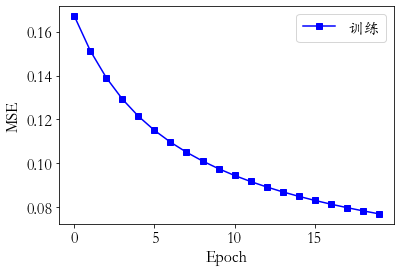

In [113]:
train(epochs=20)